In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from dmba import classificationSummary, gainsChart, plotDecisionTree, regressionSummary
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
import graphviz
import sklearn.metrics as metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
## Read the dataset

df_delay = pd.read_csv('FlightDelays.csv')
df_delay.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,37987,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime


In [3]:
## Checking the data types

df_delay.dtypes

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
Flight Status    object
dtype: object

In [4]:
## Checking for null values

df_delay.isnull().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight Status    0
dtype: int64

In [5]:
## Checking for unique Carrier

df_delay['CARRIER'].unique()

array(['OH', 'DH', 'DL', 'MQ', 'UA', 'US', 'RU', 'CO'], dtype=object)

In [6]:
## Checking for unique Destinations

df_delay['DEST'].unique()

array(['JFK', 'LGA', 'EWR'], dtype=object)

In [7]:
## Checking for unique Origin locations

df_delay['ORIGIN'].unique()

array(['BWI', 'DCA', 'IAD'], dtype=object)

In [8]:
## Checking for different weather conditions

df_delay['Weather'].unique()

array([0, 1], dtype=int64)

In [9]:
## Checking to find out what weather conditions are delaying flights

df_delay.loc[df_delay['Weather'] == 1].head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
1251,1030,RU,1057,EWR,169,2004-01-18,2303,BWI,1,7,18,N17984,delayed
1744,2120,DH,2122,JFK,228,2004-01-25,7814,IAD,1,7,25,N657BR,delayed
1814,1455,DL,1509,JFK,213,2004-01-26,746,DCA,1,1,26,N905DL,delayed
1815,730,DL,741,LGA,214,2004-01-26,1742,DCA,1,1,26,N225DL,delayed
1822,1530,DL,1540,LGA,214,2004-01-26,1758,DCA,1,1,26,N225DL,delayed


Looking at the weather types and final flight status it looks like 

Weather = 1 = Bad 

Weather = 0 = Good

In [10]:
## Checking for unique Tail numbers on the aircraft

df_delay['TAIL_NUM'].nunique()

549

In [11]:
## Checking for unique Flight numbers of the aircrafts

df_delay['FL_NUM'].nunique()

103

In [12]:
## Checking if any flights scheduled after 11pm to see next day departures

df_delay.loc[df_delay['CRS_DEP_TIME'] > 2300]

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status


In [13]:
## Checking if any flights departed after 11pm 

df_delay.loc[df_delay['DEP_TIME'] > 2300]

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
62,2120,DH,2305,JFK,228,2004-01-02,7814,IAD,0,5,2,N657BR,delayed
291,2120,DH,2312,EWR,213,2004-01-05,7304,IAD,0,1,5,N667BR,delayed
998,2120,DH,2330,EWR,213,2004-01-14,7304,IAD,0,3,14,N629BR,delayed


In [14]:
## Checking if any flights after midnight to see next day departures

df_delay.loc[(df_delay['DEP_TIME'] > 0) & (df_delay['DEP_TIME'] < 59)]

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
1270,2120,DH,10,LGA,229,2004-01-19,7684,IAD,0,1,19,N627BR,delayed


In [15]:
## Checking if any flights departed early morning to see next day departures
## 2 exist

df_delay.loc[(df_delay['DEP_TIME'] > 0) & (df_delay['DEP_TIME'] < 600)]

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
18,600,MQ,556,JFK,213,2004-01-01,4760,DCA,0,4,1,N717MQ,ontime
72,600,MQ,552,JFK,213,2004-01-02,4760,DCA,0,5,2,N736MQ,ontime
133,600,MQ,555,JFK,213,2004-01-03,4760,DCA,0,6,3,N712MQ,ontime
187,600,MQ,554,JFK,213,2004-01-04,4760,DCA,0,7,4,N737MQ,ontime
256,600,MQ,557,JFK,213,2004-01-05,4760,DCA,0,1,5,N707MQ,ontime
335,600,MQ,558,JFK,213,2004-01-06,4760,DCA,0,2,6,N739MQ,ontime
419,600,MQ,555,JFK,213,2004-01-07,4760,DCA,0,3,7,N705MQ,ontime
504,600,MQ,552,JFK,213,2004-01-08,4760,DCA,0,4,8,N737MQ,ontime
589,600,MQ,558,JFK,213,2004-01-09,4760,DCA,0,5,9,N801MQ,ontime
662,600,MQ,557,JFK,213,2004-01-10,4760,DCA,0,6,10,N718MQ,delayed


2 flights that were scheduled at 2120 departed the next day

#### Creating a new "Delayed_Departure" to capture if the departure was delayed or not

In [16]:
## New column with departure delayed or not 
## Ontime Departure = 1 & Delayed Departure = 0 

df_delay['Delayed_Departure'] = np.where(df_delay['CRS_DEP_TIME'] - df_delay['DEP_TIME'] >=0, 1, 0)

In [17]:
df_delay.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,Delayed_Departure
0,1455,OH,1455,JFK,184,37987,5935,BWI,0,4,1,N940CA,ontime,1
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime,1
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime,1
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime,1
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime,1


In [18]:
### Two flights exist that had night departures and took flight after midnight changing them to "delayed"

df_delay.at[1270,'Delayed_Departure'] = 0
df_delay.at[1606,'Delayed_Departure'] = 0

In [19]:
df_delay.iloc[1270]

CRS_DEP_TIME               2120
CARRIER                      DH
DEP_TIME                     10
DEST                        LGA
DISTANCE                    229
FL_DATE              2004-01-19
FL_NUM                     7684
ORIGIN                      IAD
Weather                       0
DAY_WEEK                      1
DAY_OF_MONTH                 19
TAIL_NUM                 N627BR
Flight Status           delayed
Delayed_Departure             0
Name: 1270, dtype: object

#### Starting the week from Sunday as 1 to Saturday as 7

In [20]:
## Change day of the week to name so that it can be encoded easily with column names

## days = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"}

## df_delay.replace({"DAY_WEEK": days},inplace=True)

In [21]:
## Starting the week from Sunday as 1 to Saturday as 7

days = {1:5,2:6,3:7,4:1,5:2,6:3,7:4}

df_delay.replace({'DAY_WEEK': days},inplace=True)

In [22]:
df_delay.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,Delayed_Departure
0,1455,OH,1455,JFK,184,37987,5935,BWI,0,1,1,N940CA,ontime,1
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,1,1,N405FJ,ontime,1
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,1,1,N695BR,ontime,1
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,1,1,N662BR,ontime,1
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,1,1,N698BR,ontime,1


In [23]:
##flightstatus = {"ontime":1,"delayed":0}

##df_delay.replace({"Flight Status":flightstatus},inplace=True)

In [24]:
##df_delay.head()

In [25]:
## Dropping unnecessary columns

## df_delay.drop(['CRS_DEP_TIME','DEP_TIME','FL_NUM','FL_DATE','TAIL_NUM'],axis=1,inplace=True)


## df_delay.head()

#### Changing the scheduled departure time to just hours 

In [26]:
df_delay.CRS_DEP_TIME = [round(t / 100) for t in df_delay.CRS_DEP_TIME]

df_delay.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,Delayed_Departure
0,15,OH,1455,JFK,184,37987,5935,BWI,0,1,1,N940CA,ontime,1
1,16,DH,1640,JFK,213,2004-01-01,6155,DCA,0,1,1,N405FJ,ontime,1
2,12,DH,1245,LGA,229,2004-01-01,7208,IAD,0,1,1,N695BR,ontime,1
3,17,DH,1709,LGA,229,2004-01-01,7215,IAD,0,1,1,N662BR,ontime,1
4,10,DH,1035,LGA,229,2004-01-01,7792,IAD,0,1,1,N698BR,ontime,1


#### Converting a few columns to category datatype for better classification

In [27]:
df_delay.CRS_DEP_TIME = df_delay.CRS_DEP_TIME.astype('category')
df_delay.Weather = df_delay.Weather.astype('category')
df_delay.DAY_WEEK = df_delay.DAY_WEEK.astype('category')

In [28]:
df_delay['Flight Status'] = df_delay['Flight Status'].replace({'ontime':1,'delayed':0})

#### Creating the final dataset with the required columns

Dropping real departure time as our priority to predict on is scheduled departure time and also that we've created a column to see if the departure was delayed or not

Distance is dropped as all the columns in the dataset are categories.

Flight date as the day of the week and day number columns already exist and this data set is only of one month

There are too many Flight numbers and tail numbers, and creating dummies for them is not useful for the model.


In [29]:
final_df = df_delay[['CRS_DEP_TIME','Delayed_Departure','CARRIER','DEST','ORIGIN','Weather','DAY_WEEK','Flight Status']].copy()

In [30]:
final_df.head()

,CRS_DEP_TIME,Delayed_Departure,CARRIER,DEST,ORIGIN,Weather,DAY_WEEK,Flight Status
0,15,1,OH,JFK,BWI,0,1,1
1,16,1,DH,JFK,DCA,0,1,1
2,12,1,DH,LGA,IAD,0,1,1
3,17,1,DH,LGA,IAD,0,1,1
4,10,1,DH,LGA,IAD,0,1,1


#### Creating the Training data set file

In [31]:
final_df.to_csv('FlightDelaysTrainingData.csv',index=False)

#### Creating the DataExploration file

In [32]:
final_df.to_csv('FlightDelaysDataExploration.csv',index=False)

In [33]:
#### Creating the Training data set file

final_df.to_csv('FlightDelaysTrainingData.csv',index=False)

#### Creating the DataExploration file

final_df.to_csv('FlightDelaysDataExploration.csv',index=False)

### Exploring Data

In [34]:
final_df.pivot_table('DAY_WEEK', index='Flight Status', columns='Weather',aggfunc='count')

Weather,0,1
Flight Status,,
0,396,32
1,1773,0


In [35]:
final_df.pivot_table('CARRIER', index='DAY_WEEK', columns='ORIGIN',aggfunc='count')

ORIGIN,BWI,DCA,IAD
DAY_WEEK,,,
1,24,237,111
2,25,246,120
3,24,137,89
4,19,152,82
5,17,196,95
6,17,198,92
7,19,204,97


In [36]:
final_df.pivot_table('CARRIER', index='DAY_WEEK', columns='DEST',aggfunc='count')

DEST,EWR,JFK,LGA
DAY_WEEK,,,
1,113,63,196
2,122,64,205
3,86,59,105
4,72,55,126
5,90,47,171
6,86,48,173
7,96,50,174


In [37]:
pivot = final_df.pivot_table('DAY_WEEK', index='CARRIER', columns='Flight Status',aggfunc='count')
pivot

Flight Status,0,1
CARRIER,,
CO,26,68
DH,137,414
DL,47,341
MQ,80,215
OH,4,26
RU,94,314
UA,5,26
US,35,369


In [41]:
pivot['Average Delay'] = (pivot[0]/(pivot[0] + pivot[1]))
pivot

Flight Status,0,1,Average Delay
CARRIER,,,
CO,26,68,0.276596
DH,137,414,0.248639
DL,47,341,0.121134
MQ,80,215,0.271186
OH,4,26,0.133333
RU,94,314,0.230392
UA,5,26,0.161290
US,35,369,0.086634


### Feature Selection

In [44]:
## Defining independent and depended columns

X = pd.get_dummies(final_df[['CRS_DEP_TIME','Delayed_Departure','CARRIER','DEST','ORIGIN','Weather','DAY_WEEK']])
y = final_df['Flight Status']

In [45]:
#Splitting the dataset to train and test data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=101)

In [46]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (1474, 40) (1474,)
Test (727, 40) (727,)


### Chi-Squared Feature Selection

In [49]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x000001B6A64FA8B0>)

In [51]:
X_train.columns

Index(['Delayed_Departure', 'CRS_DEP_TIME_6', 'CRS_DEP_TIME_7',
       'CRS_DEP_TIME_8', 'CRS_DEP_TIME_9', 'CRS_DEP_TIME_10',
       'CRS_DEP_TIME_11', 'CRS_DEP_TIME_12', 'CRS_DEP_TIME_13',
       'CRS_DEP_TIME_14', 'CRS_DEP_TIME_15', 'CRS_DEP_TIME_16',
       'CRS_DEP_TIME_17', 'CRS_DEP_TIME_18', 'CRS_DEP_TIME_19',
       'CRS_DEP_TIME_20', 'CRS_DEP_TIME_21', 'CARRIER_CO', 'CARRIER_DH',
       'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA',
       'CARRIER_US', 'DEST_EWR', 'DEST_JFK', 'DEST_LGA', 'ORIGIN_BWI',
       'ORIGIN_DCA', 'ORIGIN_IAD', 'Weather_0', 'Weather_1', 'DAY_WEEK_1',
       'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4', 'DAY_WEEK_5', 'DAY_WEEK_6',
       'DAY_WEEK_7'],
      dtype='object')

Feature 0: 117.410494
Feature 1: 1.446246
Feature 2: 0.000318
Feature 3: 0.023694
Feature 4: 4.485986
Feature 5: 1.522559
Feature 6: 3.706472
Feature 7: 1.446246
Feature 8: 3.314081
Feature 9: 0.515174
Feature 10: 13.143050
Feature 11: 0.170562
Feature 12: 2.449676
Feature 13: 1.269442
Feature 14: 3.897926
Feature 15: 0.088776
Feature 16: 1.722903
Feature 17: 2.068920
Feature 18: 6.670314
Feature 19: 8.163570
Feature 20: 11.325131
Feature 21: 0.215363
Feature 22: 0.843531
Feature 23: 0.358938
Feature 24: 23.877073
Feature 25: 3.051534
Feature 26: 2.504756
Feature 27: 4.779395
Feature 28: 5.079684
Feature 29: 7.524986
Feature 30: 8.550548
Feature 31: 2.056898
Feature 32: 110.234483
Feature 33: 1.053229
Feature 34: 0.062635
Feature 35: 8.101739
Feature 36: 5.249380
Feature 37: 6.730063
Feature 38: 1.103105
Feature 39: 2.296288


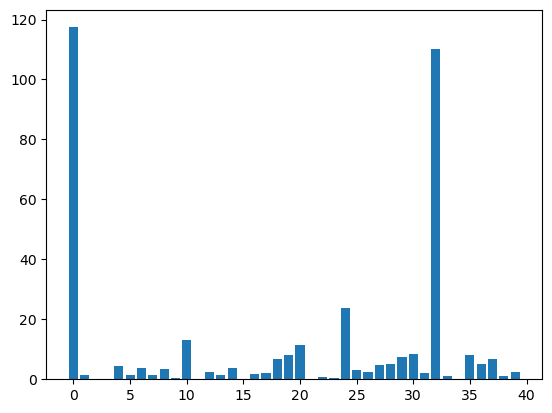

In [50]:
# Checking the scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

The features with most importance to the final data are Delayed Departure and Weather conditions

## Naive Bayes 

In [52]:
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [53]:
y_pred = delays_nb.predict(X_valid)

In [54]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score: 0.8418


In [56]:
### Checking for overfitting


y_pred_train = delays_nb.predict(X_train)

y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [57]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8372


In [58]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(delays_nb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(delays_nb.score(X_valid, y_valid)))

Training set score: 0.8372
Test set score: 0.8418


In [59]:
confusion_matrix = confusion_matrix(y_valid, y_pred)
print(confusion_matrix)

[[ 43  95]
 [ 20 569]]


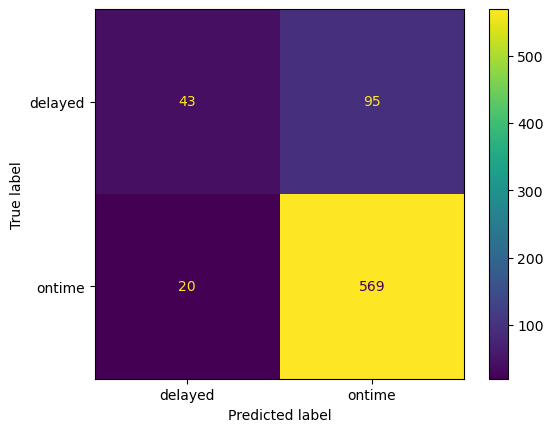

In [60]:
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["delayed", "ontime"],)

cm.plot()
plt.show()

### CART Algorithm

In [61]:
classTree = DecisionTreeClassifier(max_depth=7)
classTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [62]:
text_representation = tree.export_text(classTree)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_19 <= 0.50
|   |   |--- feature_32 <= 0.50
|   |   |   |--- feature_26 <= 0.50
|   |   |   |   |--- feature_35 <= 0.50
|   |   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_24 >  0.50
|   |   |   |   |   |   |--- feature_33 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_33 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_35 >  0.50
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_26 >  0.50
|   |   |   |   |

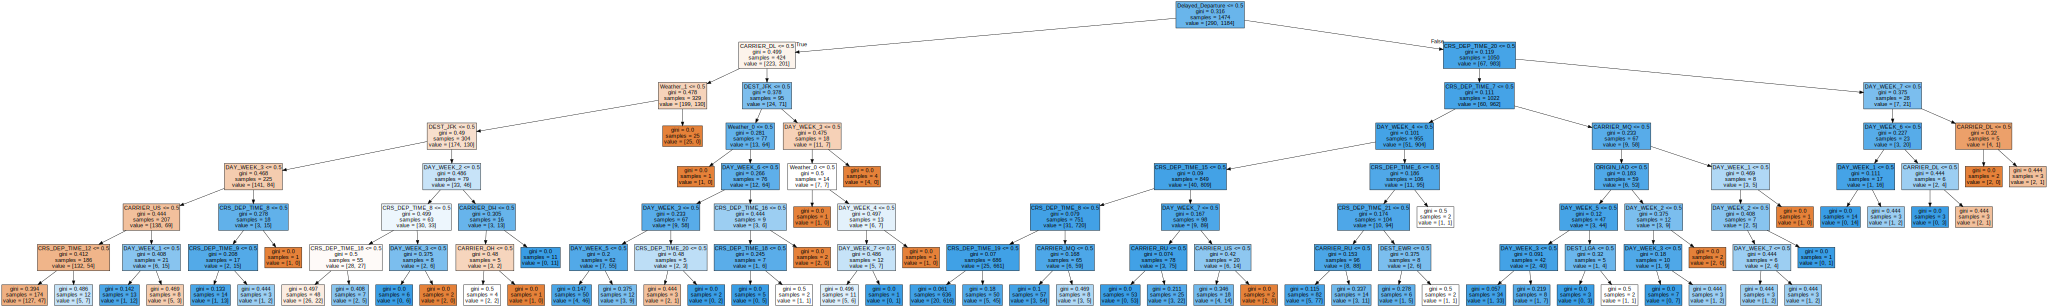

In [65]:
dot_data = tree.export_graphviz(classTree, 
                                out_file=None, 
                                feature_names=X.columns, 
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [66]:
## Predicting the model on test data

y_pred = classTree.predict(X_valid)

In [67]:
## Accuracy of the test data

print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.8239339752407153


In [68]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classTree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classTree.score(X_valid, y_valid)))

Training set score: 0.8942
Test set score: 0.8239


In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix1 = confusion_matrix(y_valid, y_pred)
print(confusion_matrix1)

[[ 84  54]
 [ 74 515]]


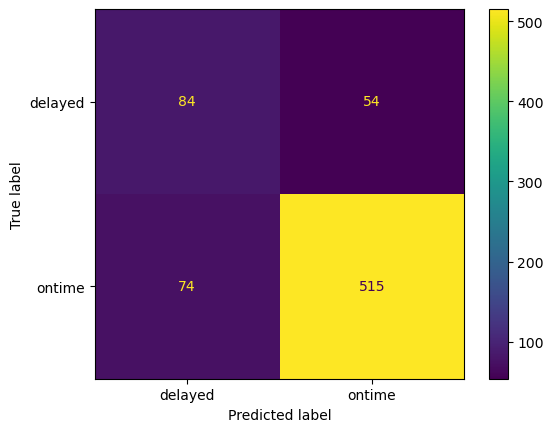

In [71]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = ["delayed", "ontime"])

cm_display.plot()
plt.show()

### Logistic Regression

In [72]:
model = LogisticRegression()

In [73]:
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
train_acc = model.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 86.63500678426051


In [75]:
y_pred = model.predict(X_valid)

In [76]:
test_acc = accuracy_score(y_valid, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 85.14442916093536


In [77]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       138
           1       0.90      0.92      0.91       589

    accuracy                           0.85       727
   macro avg       0.76      0.74      0.75       727
weighted avg       0.85      0.85      0.85       727



In [78]:
from sklearn.metrics import confusion_matrix

confusion_matrix2 = confusion_matrix(y_valid, y_pred)
print(confusion_matrix2)

[[ 76  62]
 [ 46 543]]


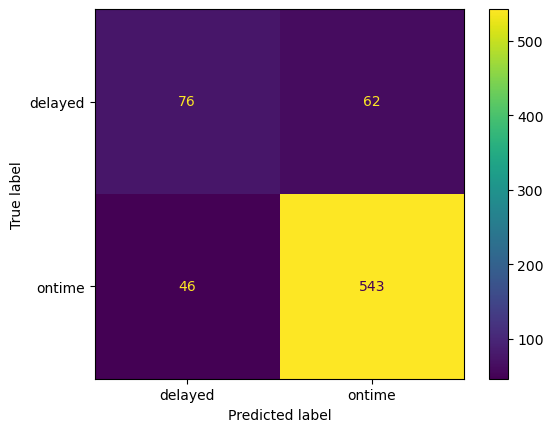

In [79]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = ["delayed", "ontime"])

cm_display.plot()
plt.show()

### Creating a Test Data set

In [80]:
test_data = X.sample(n = 5)

In [81]:
naives_pred = delays_nb.predict(test_data)
cart_pred = classTree.predict(test_data)
log_pred = model.predict(test_data)

In [82]:
test_data['Naives_Prediction'] = naives_pred
test_data['CART_Prediction'] = cart_pred
test_data['Logistic_Prediction'] = log_pred

In [83]:
test_data.to_csv('FlightDelaysTestingData.csv',index=False)